In [57]:
from scipy.integrate import solve_ivp
import numpy as np

from drone_utils_2 import *
from visualize import (
    plot_trajectory,
    animate_trajectory,
    plot_rotor_control,
    plot_angles,
)
from IPython.display import Video

from matplotlib import pyplot as plt

plt.rcParams["figure.dpi"] = 300

In [58]:
t_init = 0
t_final = 1
t_range = np.linspace(t_init, t_final, 30)

inerx = 1
inery = 1
inerz = 1
L = 1
lam = 1
g = 9.8
m = 1

In [59]:
state_init = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3])

costate_init = np.zeros(12)

state_costate_init = np.hstack(
    [state_init, costate_init]
)  # We will call this `y` moving forward

In [60]:
def ode(t, y):
    state = y[:12]
    costate = y[12:]

    control = optimal_control(costate, inerx, inery, inerz, L, lam, m)

    return np.hstack(
        [
            state_dot(state, control, inerx, inery, inerz, L, lam, g, m),
            costate_dot(
                state,
                costate,
                inerx,
                inery,
                inerz,
                g,
                alpha=1,  # Penalizes yaw
                beta=1,  # Penalizes tilt (pitch and roll)
                gamma=1,  # Penalizes position
            ),
        ]
    )

In [61]:
t_range.shape

(30,)

In [62]:
sol = solve_ivp(ode, (t_init, t_final), state_costate_init, t_eval=t_range)

In [63]:
sol.status, sol.message

(0, 'The solver successfully reached the end of the integration interval.')

In [64]:
sol.y.shape

(24, 30)

In [65]:
t_range.shape

(30,)

In [66]:
control = optimal_control(sol.y[12:], inerx, inery, inerz, L, lam, m)

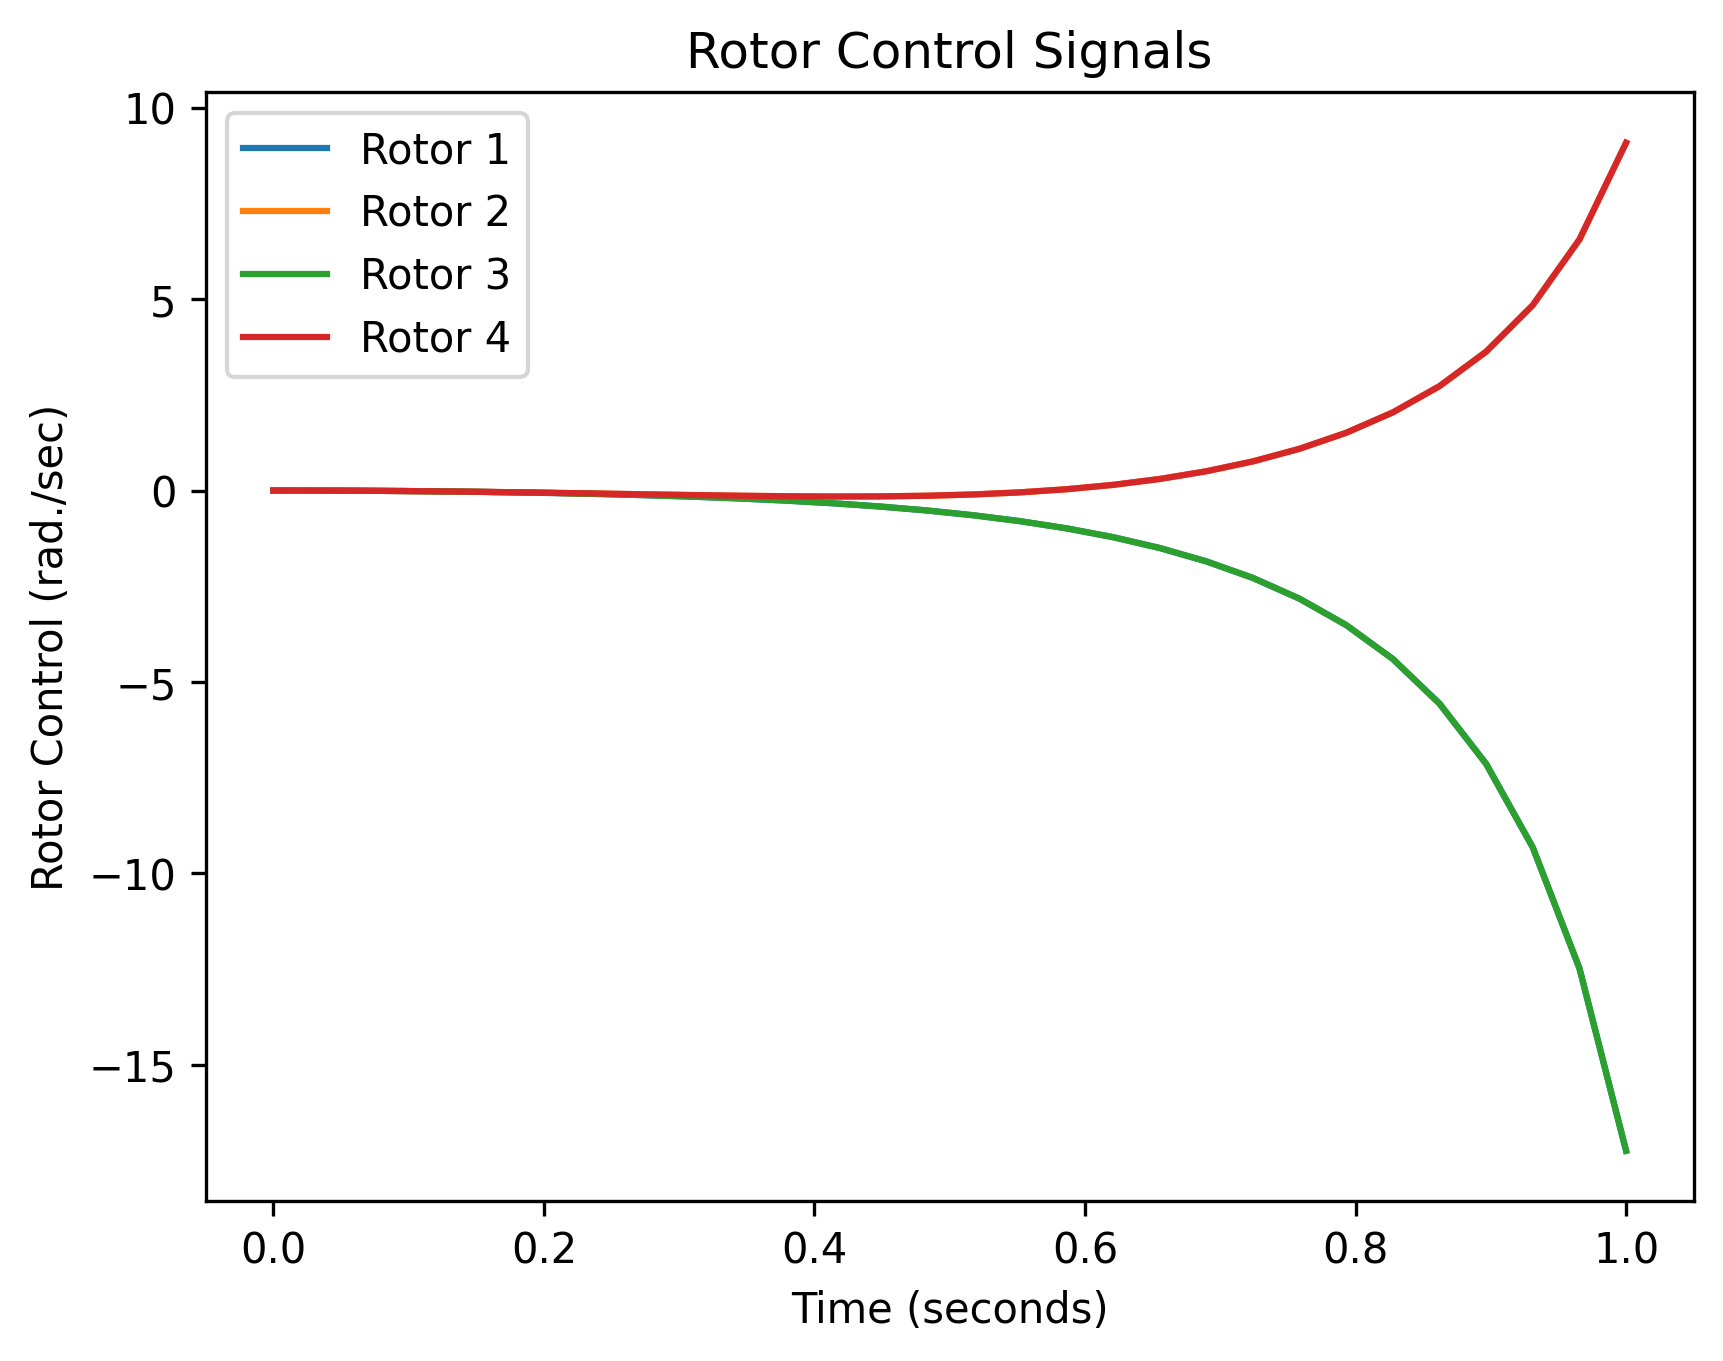

In [67]:
plot_rotor_control(sol.t, control.T)

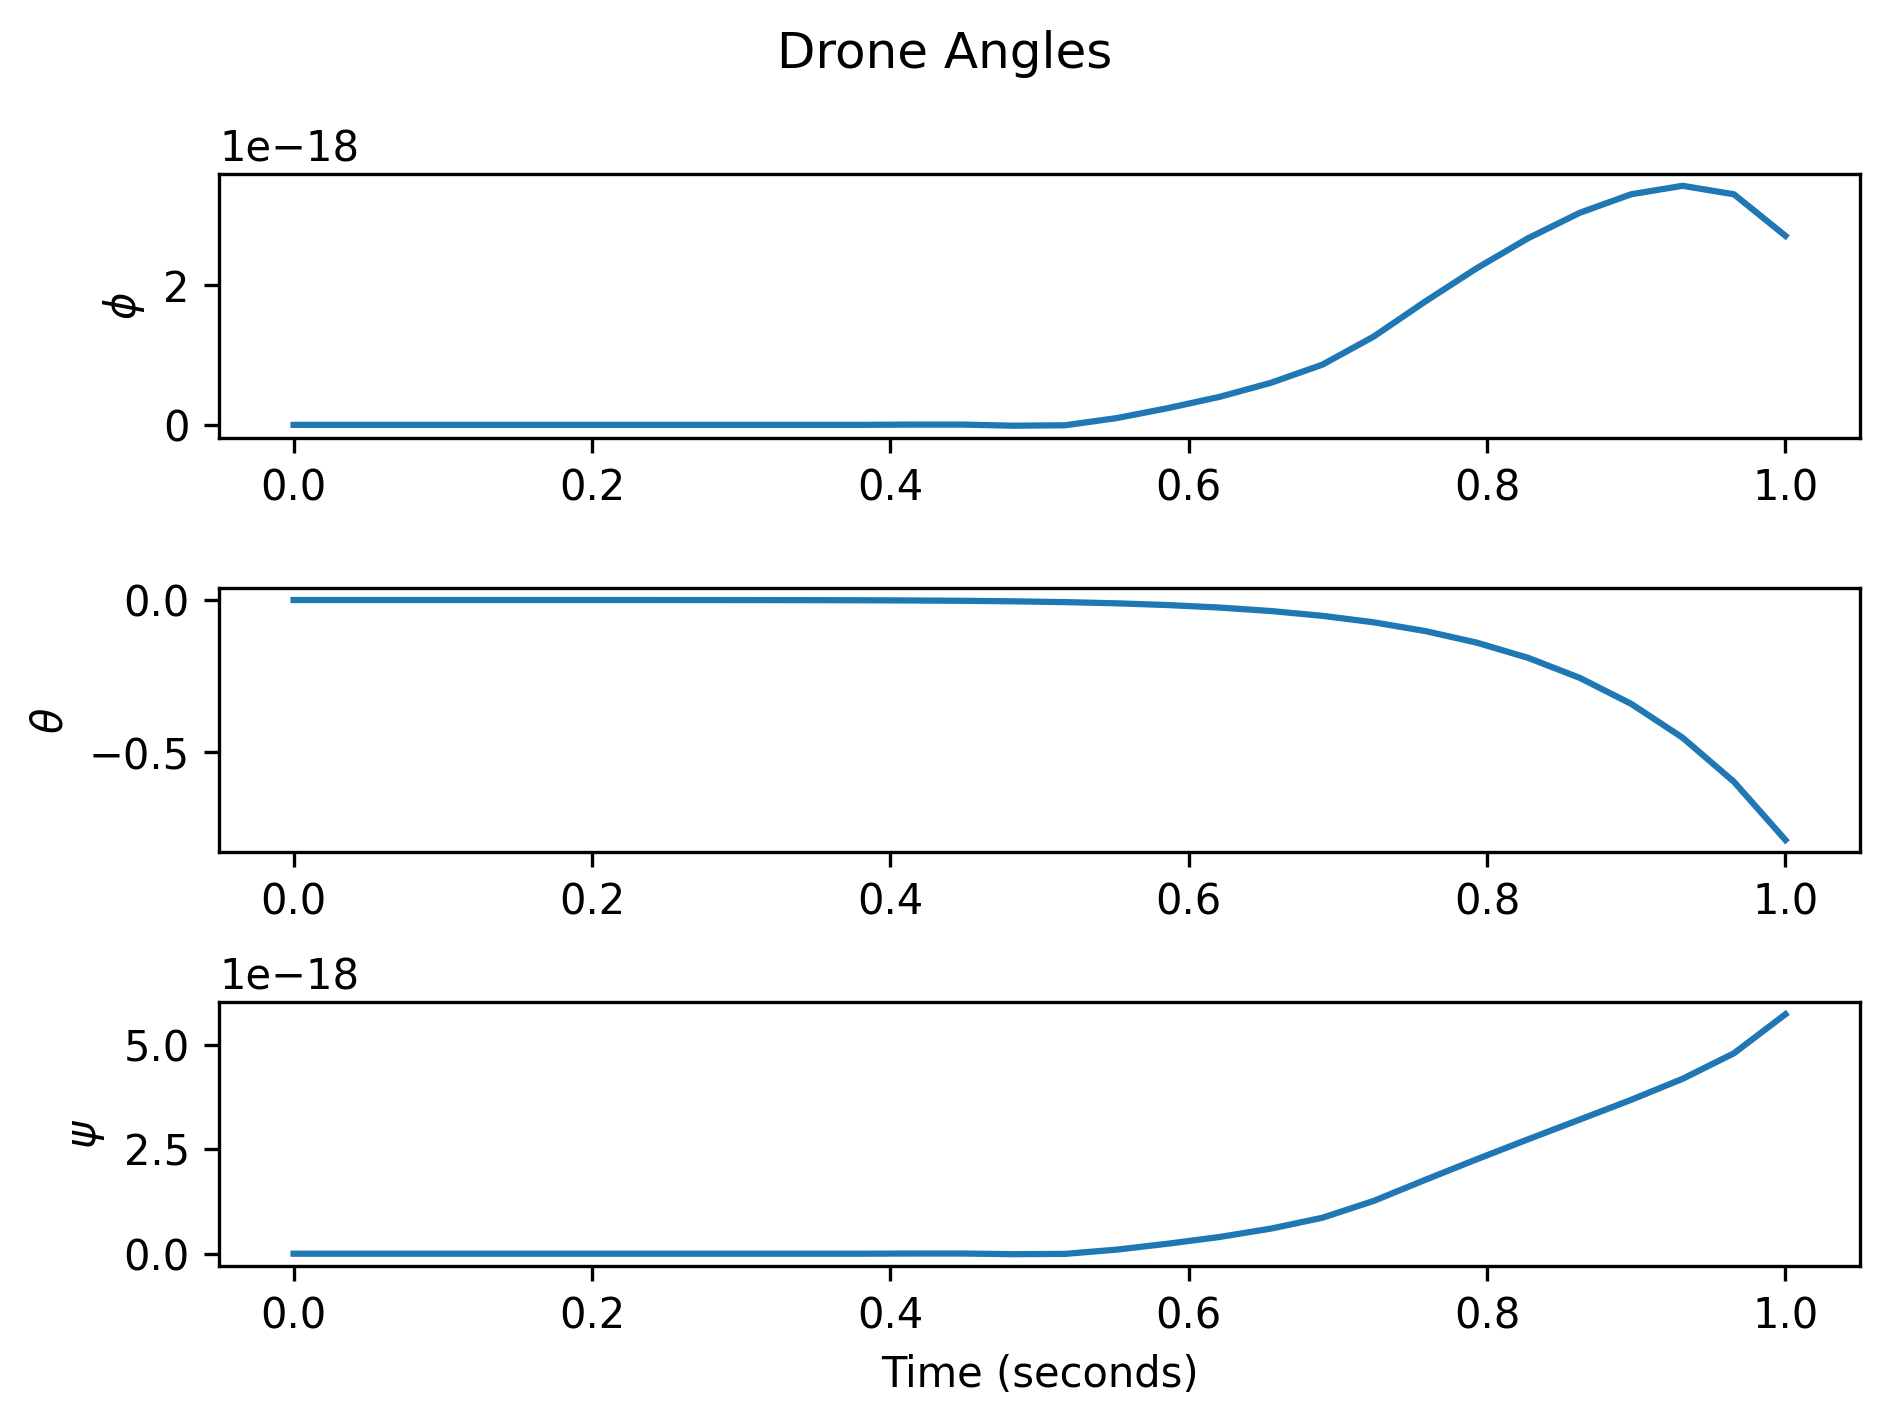

In [68]:
plot_angles(sol.t, sol.y)

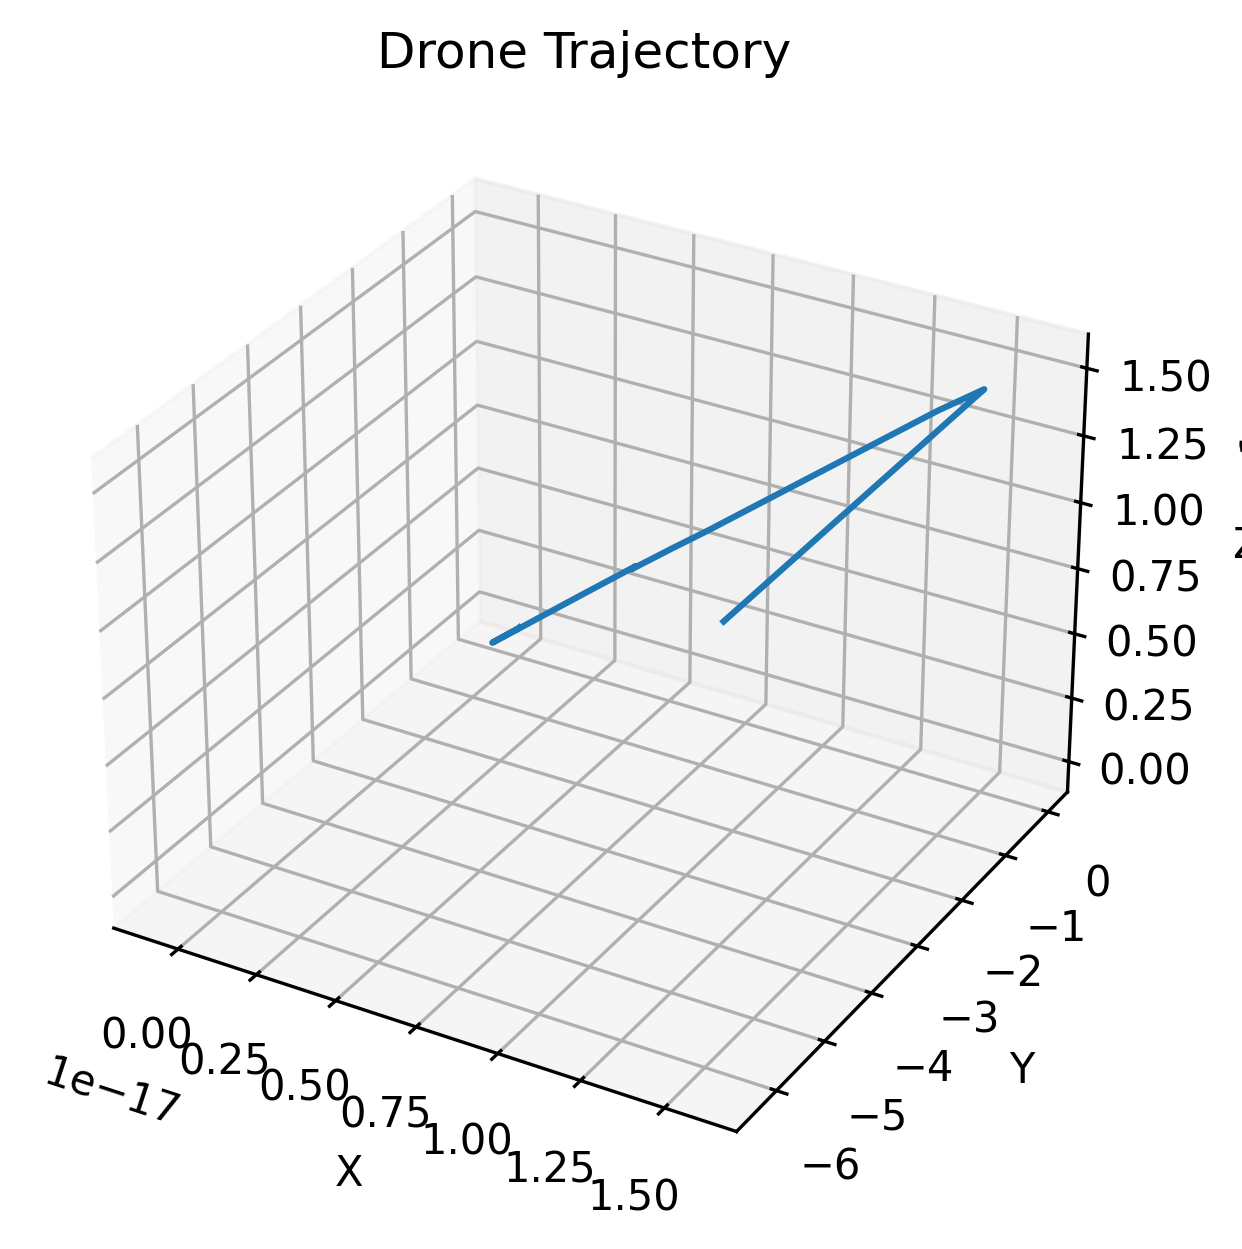

In [69]:
plot_trajectory(sol.y)

In [70]:
Video(animate_trajectory(t_final, sol.y))